# ROC curves
## Comparison of different trainings with different setups for inference

In [5]:
# Hendrik Schönen
# This script plots ROC curves
# It requires the datapoints created by scripts/plot_roc.py

import numpy as np
import pandas
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.cms.style.ROOT)
plt.rcParams['axes.axisbelow'] = True

In [6]:
model_names = ['nominal','fgsm-0_01','fgsm-0_02']
prediction_names = ['nominal','fgsm-0_01','fgsm-0_02']#['nominal','fgsm-0_005','fgsm-0_01','fgsm-0_015','fgsm-0_02','fgsm--0_01']
model_dir = '/net/scratch_cms3a/hschoenen/deepjet/results/'
save_dir = '/net/scratch_cms3a/hschoenen/deepjet/plots/roc_curves/'

In [7]:
model_labels = {
    'nominal': 'nominal training',
    'fgsm-0_005': r'fgsm training $\epsilon=0.005$',
    'fgsm-0_01': r'fgsm training $\epsilon=0.01$',
    'fgsm-0_015': r'fgsm training $\epsilon=0.015$',
    'fgsm-0_02': r'fgsm training $\epsilon=0.02$',
}
prediction_labels = {
    'nominal': 'nominal inputs',
    'fgsm-0_005': r'fgsm inputs $\epsilon=0.005$',
    'fgsm-0_01': r'fgsm inputs $\epsilon=0.01$',
    'fgsm-0_015': r'fgsm inputs $\epsilon=0.015$',
    'fgsm-0_02': r'fgsm inputs $\epsilon=0.02$',
    'fgsm--0_01': r'fgsm inputs $\epsilon=-0.01$',
}

# decide, whether models are plotted in different colors or linestyles
model_linestyles = False

linestyles = ['solid','dashed','dotted','dashdot']
colors = ['tab:blue','tab:orange','tab:green', 'tab:purple', 'tab:red', 'tab:olive', 'tab:cyan', 'tab:pink', 'tab:brown', 'tab:grey']

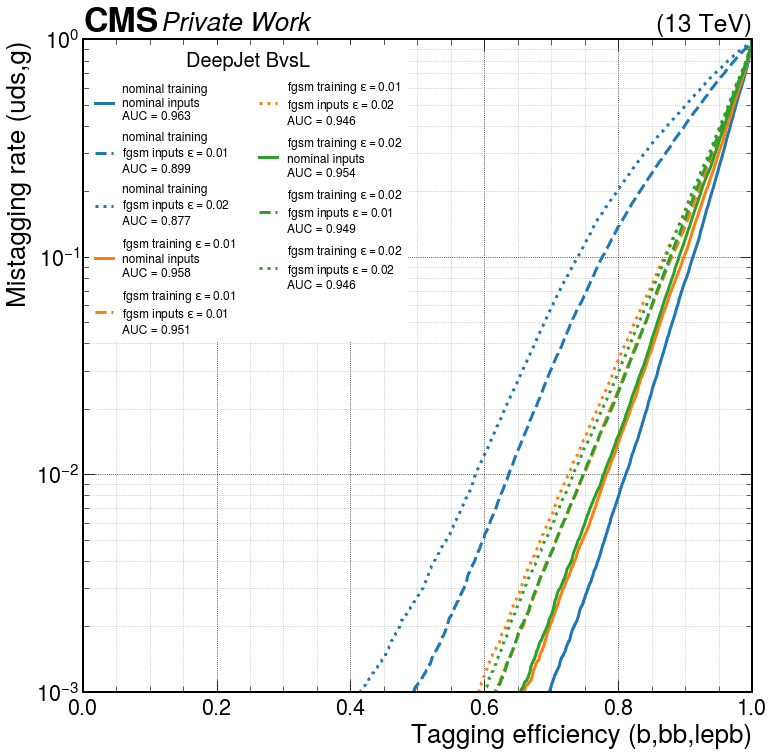

In [8]:
# BvsL
fig,ax = plt.subplots(figsize=[12,12])
ax.set_xlim(left=0.,right=1)
ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)
ax.set_ylim(top=1)

tag_name = ' (b,bb,lepb)'
mistag_name = ' (uds,g)'

ax.set_ylabel('Mistagging rate'+mistag_name)
ax.set_xlabel('Tagging efficiency'+tag_name)
ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')

legtitle = 'BvsL'
legloc = 'upper left'
title=''
for i,model in enumerate(model_names):
    title = title + model + '_'
    for j,prediction in enumerate(prediction_names):
        xya = np.load(model_dir+model+'/predict_'+prediction+'/BvL.npy', allow_pickle=True)
        legend_text = model_labels[model] + '\n' + prediction_labels[prediction] + '\n' + 'AUC = ' + f'{xya[2,0]:.3f}'
        if model_linestyles:
            ax.plot(xya[0], xya[1], linestyle=linestyles[i], color=colors[j], linewidth=3.0, label=legend_text)
        else:
            ax.plot(xya[0], xya[1], linestyle=linestyles[j], color=colors[i], linewidth=3.0, label=legend_text)
# make ROC=0.5 line
#ax.plot(np.arange(1e-3,1,1e-3),np.arange(1e-3,1,1e-3), color='black')
# make legend
if len(model_names)*len(prediction_names)<8:
    leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
else:
    leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,ncols=2,fontsize=12,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
if len(model_names)*len(prediction_names)>8:
    leg._legend_box.align = 'center'
leg.get_frame().set_linewidth(0.0)
hep.cms.label(llabel='Private Work',rlabel='(13 TeV)')
fig.savefig(save_dir + title + '_BvsL_ROC.pdf', bbox_inches='tight')

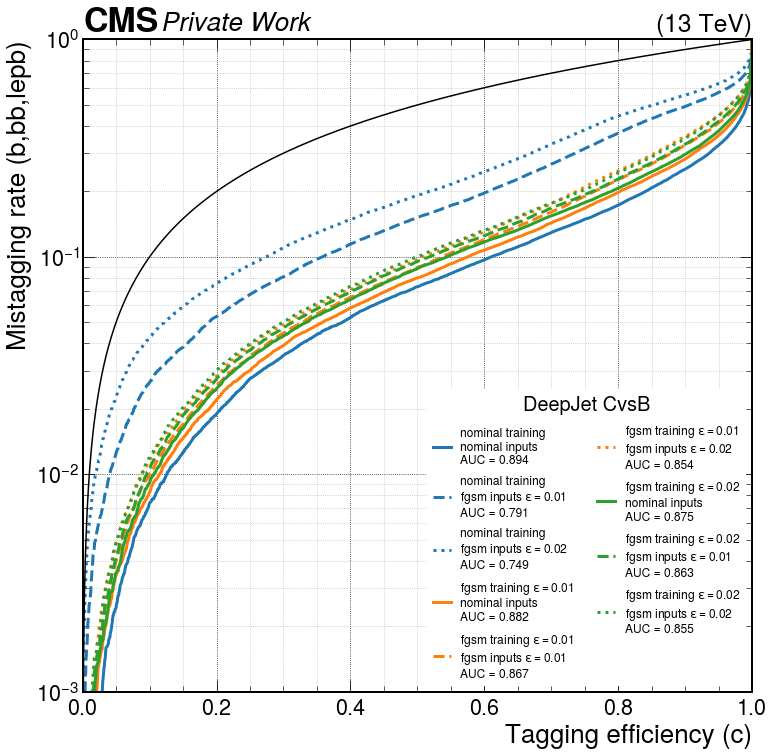

In [9]:
# CvsB
fig,ax = plt.subplots(figsize=[12,12])
ax.set_xlim(left=0.,right=1)
ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)
ax.set_ylim(top=1)

tag_name = ' (c)'
mistag_name = ' (b,bb,lepb)'

ax.set_ylabel('Mistagging rate'+mistag_name)
ax.set_xlabel('Tagging efficiency'+tag_name)
ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')

legtitle = 'CvsB'
legloc = 'lower right'
title=''
for i,model in enumerate(model_names):
    title = title + model + '_'
    for j,prediction in enumerate(prediction_names):
        xya = np.load(model_dir+model+'/predict_'+prediction+'/CvB.npy', allow_pickle=True)
        legend_text = model_labels[model] + '\n' + prediction_labels[prediction] + '\n' + 'AUC = ' + f'{xya[2,0]:.3f}'
        if model_linestyles:
            ax.plot(xya[0], xya[1], linestyle=linestyles[i], color=colors[j], linewidth=3.0, label=legend_text)
        else:
            ax.plot(xya[0], xya[1], linestyle=linestyles[j], color=colors[i], linewidth=3.0, label=legend_text)
# make ROC=0.5 line
ax.plot(np.arange(1e-3,1,1e-3),np.arange(1e-3,1,1e-3), color='black')
# make legend
if len(model_names)*len(prediction_names)<8:
    leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
else:
    leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,ncols=2,fontsize=12,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
if len(model_names)*len(prediction_names)>8:
    leg._legend_box.align = 'center'
leg.get_frame().set_linewidth(0.0)
hep.cms.label(llabel='Private Work',rlabel='(13 TeV)')
fig.savefig(save_dir + title + '_CvsB_ROC.pdf', bbox_inches='tight')

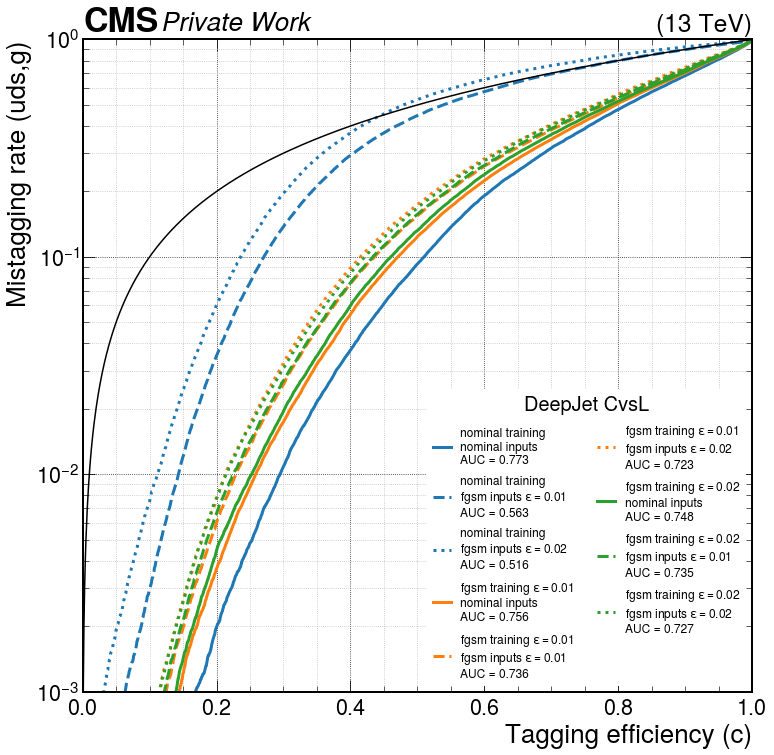

In [10]:
# CvsL
fig,ax = plt.subplots(figsize=[12,12])
ax.set_xlim(left=0.,right=1)
ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)
ax.set_ylim(top=1)

tag_name = ' (c)'
mistag_name = ' (uds,g)'

ax.set_ylabel('Mistagging rate'+mistag_name)
ax.set_xlabel('Tagging efficiency'+tag_name)
ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')

legtitle = 'CvsL'
legloc = 'lower right'
title=''
for i,model in enumerate(model_names):
    title = title + model + '_'
    for j,prediction in enumerate(prediction_names):
        xya = np.load(model_dir+model+'/predict_'+prediction+'/CvL.npy', allow_pickle=True)
        legend_text = model_labels[model] + '\n' + prediction_labels[prediction] + '\n' + 'AUC = ' + f'{xya[2,0]:.3f}'
        if model_linestyles:
            ax.plot(xya[0], xya[1], linestyle=linestyles[i], color=colors[j], linewidth=3.0, label=legend_text)
        else:
            ax.plot(xya[0], xya[1], linestyle=linestyles[j], color=colors[i], linewidth=3.0, label=legend_text)
# make ROC=0.5 line
ax.plot(np.arange(1e-3,1,1e-3),np.arange(1e-3,1,1e-3), color='black')
# make legend
if len(model_names)*len(prediction_names)<8:
    leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
else:
    leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,ncols=2,alignment='center',fontsize=12,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
if len(model_names)*len(prediction_names)>8:
    leg._legend_box.align = 'center'
leg.get_frame().set_linewidth(0.0)
hep.cms.label(llabel='Private Work',rlabel='(13 TeV)')
fig.savefig(save_dir + title + '_CvsL_ROC.pdf', bbox_inches='tight')